In [1]:
import os
from pprint import pprint

In [2]:
ntasks = 480
NXGLOB = 1440
NYGLOB = 1080
BLCKX = NXGLOB / 90
BLCKY = NYGLOB / 90
print(BLCKX, BLCKY)
a = NXGLOB*NYGLOB
b = BLCKX*BLCKY*ntasks
MXBLCKS = a/b
MXBLCKS

16.0 12.0


16.875

In [3]:
#runtime = ((tmean * tsteps - tmax) / (tsteps - 1))

In [4]:
a = (32*0.52-0.58)/(32-1)

In [5]:
(32*1.66-1.72)/(32-1) / a

3.2004981320049803

In [6]:
361/99

3.6464646464646466

In [7]:
def runtime_cal(tmean, tmax, tsteps=32):
    return ((tmean * tsteps - tmax) / (tsteps - 1))

In [8]:
dir_path = '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/om2-scalings_tests'
folder_names = [
    'Ctrl-0.25deg_jra55do_ryf-ice-99cores',  # 99 120 cores
    'Ctrl-0.25deg_jra55do_ryf-ice-190cores', # 200 120 cores
    'Ctrl-0.25deg_jra55do_ryf', # 361 480 cores spack
    # 'Ctrl-0.25deg_jra55do_ryf-ice-697cores', # 697  120 cores
    # 'Ctrl-0.25deg_jra55do_ryf-ice-697cores2', # 697 120 cores
    'Ctrl-0.25deg_jra55do_ryf-ice-529cores',
    'Ctrl-0.25deg_jra55do_ryf-ice-697cores3', # 697 480 cores spack
]
file_paths = [os.path.join(dir_path, folder_name, 'archive/output000/ice/ice_diag.d') for folder_name in folder_names]

timing_info_alli = []
for file_path in file_paths:
    timing_info = {}
    with open(file_path, 'r') as f:
        lines = f.readlines()
    for i, line in enumerate(lines):
        if "Timer   3:  Dynamics" in line:
            max_line = lines[i + 2].strip()
            mean_line = lines[i + 3].strip()
    
            timing_info["max"] = float(max_line.split('=')[-1].strip().split()[0])
            timing_info["mean"] = float(mean_line.split('=')[-1].strip().split()[0])

    timing_info_alli.append(timing_info)

ice_runtime = [runtime_cal(timing_info['mean'], timing_info['max'])/32 for timing_info in timing_info_alli]
ice_runtime

[0.051814516129032255,
 0.03289314516129033,
 0.01618951612903226,
 0.016008064516129034,
 0.024143145161290323]

In [9]:
1.6580645161290322/32

0.051814516129032255

In [10]:
dir_path = '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/om2-scalings_tests'
folder_names = [
    'Ctrl-0.25deg_jra55do_ryf-mom213',  # 192
    'Ctrl-0.25deg_jra55do_ryf-mom384', # 200 120 cores
    'Ctrl-0.25deg_jra55do_ryf-mom768', # 361 480 cores spack
    'Ctrl-0.25deg_jra55do_ryf-mom1536', # 697  120 cores
    'Ctrl-0.25deg_jra55do_ryf-mom3072', # 697 120 cores
    'Ctrl-0.25deg_jra55do_ryf-mom3840', # 697 120 cores
    # 'Ctrl-0.25deg_jra55do_ryf-mom6144', # 697 480 cores spack
    # 'Ctrl-0.25deg_jra55do_ryf-mom12288', # 697 480 cores spack
]
file_paths = [os.path.join(dir_path, folder_name, 'archive/output000/access-om2.out') for folder_name in folder_names]


timing_info_all = []
for file_path in file_paths:
    with open(file_path, 'r') as file:
        main_loop_info = {}
        for line in file:
            if line.strip().startswith("Main Loop"):
                #print(line)
                # Split the line by whitespace and extract values
                parts = line.split()
                
                # Check if the line has the expected number of parts (at least 5 for Main Loop stats)
                if len(parts) >= 5:
                    try:
                        main_loop_info['tmin'] = float(parts[2])/32
                        main_loop_info['tmax'] = float(parts[3])/32
                        main_loop_info['tavg'] = float(parts[4])/32
                        main_loop_info['tstd'] = float(parts[5])/32
                    except ValueError as e:
                        print(f"Error converting values: {e}")

        timing_info_all.append(main_loop_info)

pprint(timing_info_all)

[{'tavg': 2.4001540625,
  'tmax': 2.40026203125,
  'tmin': 2.39993175,
  'tstd': 5.403125e-05},
 {'tavg': 1.16896559375,
  'tmax': 1.16912115625,
  'tmin': 1.16875090625,
  'tstd': 6.015625e-05},
 {'tavg': 0.583133625,
  'tmax': 0.583376,
  'tmin': 0.58302365625,
  'tstd': 4.246875e-05},
 {'tavg': 0.38928321875,
  'tmax': 0.389380375,
  'tmin': 0.38920415625,
  'tstd': 3.640625e-05},
 {'tavg': 0.16674321875,
  'tmax': 0.1670044375,
  'tmin': 0.16662096875,
  'tstd': 8.609375e-05},
 {'tavg': 0.13754578125,
  'tmax': 0.137677375,
  'tmin': 0.13749746875,
  'tstd': 4.2e-05}]


In [11]:
from matplotlib import pyplot as plt
import sys
tool_dir0 = '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/ESMF_profiling'
sys.path.append(tool_dir0)

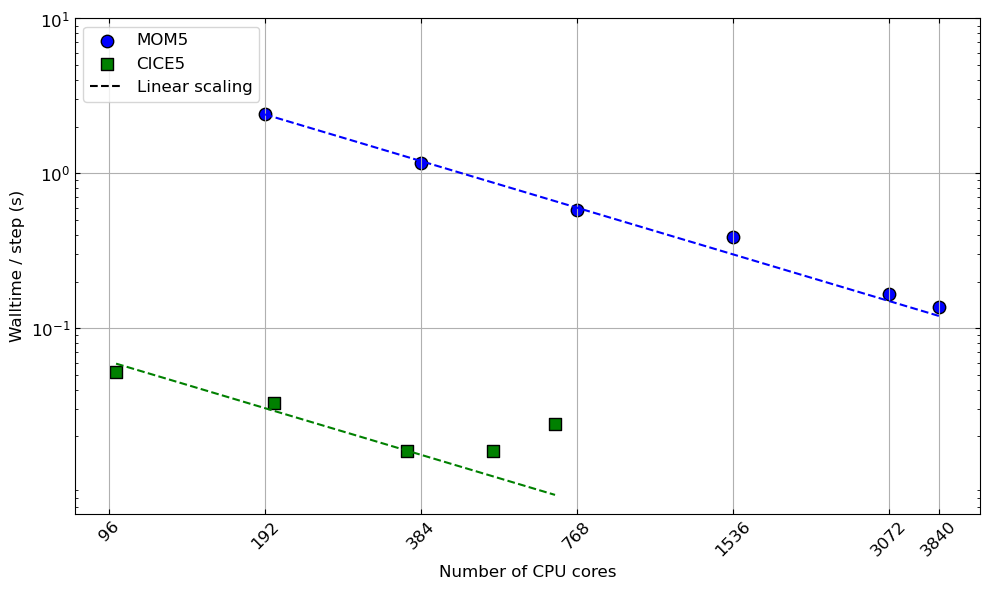

In [12]:
label_fontsize = 12
legend_fontsize = 12
marker = ['P', 'o', 's', '^', 'v', 'D', 'p', '*']
nrows = 1
ncols = 1
figsize = (10, 6)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
axes = axes.flatten() if (nrows * ncols > 1) else [axes]

colors = ['r', 'b', 'g', 'darkorange', 'pink', 'cyan', 'lime', 'silver', 'gold', 'purple', 'grey', 'r', 'g', 'pink']
x_valueso = [192, 384, 768, 1536, 3072, 3840]
axes[0].scatter(x_valueso, [timing_info['tavg'] for timing_info in timing_info_all], marker='o',
                            facecolors='b', edgecolors='k', s=80)

x_valuesi = [99, 200, 361, 529, 697]
axes[0].scatter(x_valuesi, [i for i in ice_runtime], marker='s',
                            facecolors='g', edgecolors='k', s=80)
axes[0].plot([], [], '--', color='k')

initial_y = timing_info_all[0]['tavg']
y_valueso = [initial_y * (x_valueso[0]/x) for x in x_valueso]
axes[0].plot(x_valueso, y_valueso, '--', color='b')


initial_y = ice_runtime[2]
y_valuesi = [initial_y * (x_valuesi[2]/x) for x in x_valuesi]
axes[0].plot(x_valuesi, y_valuesi, '--', color='g')

axes[0].grid(True)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].legend(['MOM5','CICE5', 'Linear scaling'], loc='upper left', fontsize=legend_fontsize)
xticks = [99, 361, 192, 768, 1536, 3072, 3840]
xticks = [96, 192, 384, 768, 1536, 3072, 3840]
xticks_unique = list(dict.fromkeys(xticks))
axes[0].set_xticks(xticks_unique)
axes[0].set_xticklabels(xticks_unique, rotation=45, fontsize=label_fontsize)
axes[0].set_yticks([0.1, 1.0, 10])
axes[0].set_yticklabels(['$10^{-1}$', '$10^0$', '$10^1$'], rotation=0, fontsize=label_fontsize)
axes[0].xaxis.set_minor_locator(plt.NullLocator())
plt.gca().tick_params(axis='both', which='both', direction='in', top=True, right=True)
axes[0].set_xlabel('Number of CPU cores', fontsize=label_fontsize)
axes[0].set_ylabel('Walltime / step (s)', fontsize=label_fontsize)
plt.tight_layout()
pic_name = "performance_plot-om2"
file_path = os.path.join(tool_dir0, pic_name+ ".png")
plt.savefig(file_path,dpi=400)
plt.show()

In [18]:
[timing_info['tavg'] for timing_info in timing_info_all]

[2.4001540625,
 1.16896559375,
 0.583133625,
 0.38928321875,
 0.16674321875,
 0.13754578125]

In [16]:
[timing_info['tavg']*tmp/3600 for timing_info, tmp  in zip(timing_info_all, x_valueso)]

[0.12800821666666665,
 0.12468966333333334,
 0.12440184,
 0.16609417333333334,
 0.14228754666666668,
 0.1467155]

In [19]:
[i for i in ice_runtime]

[0.051814516129032255,
 0.03289314516129033,
 0.01618951612903226,
 0.016008064516129034,
 0.024143145161290323]

In [17]:
[i*j/3600 for i,j in zip(ice_runtime, x_valuesi)]

[0.0014248991935483868,
 0.0018273969534050184,
 0.0016234487007168463,
 0.002352296146953405,
 0.004674381160394266]